# Pytsal Forecasting Tutorial

**Created using: Pytsal 1.1.0**

**Date Updated: May 08, 2021**

**Tutorial Author: Krishnan S G**


## 1.0 Tutorial Objective

Welcome to Forecasting Tutorial. This tutorial assumes that you are new to Pytsal and looking to get started with Forecasting using the `pytsal.forecasting` Module.

In this tutorial we will learn:

* **Getting Data**: How to import data from Pytsal repository
* **Setting up Environment**: How to setup an experiment in Pytsal and get started with building forecasting models
* **Create Model**: How to create a model, perform cross validation and evaluate forecasting metrics
* **Tune Model**: How to automatically tune the hyperparameters of a forecasting model
* **Plot Model**: How to analyze model performance using various plots
* **Finalize Model**: How to finalize the best model at the end of the experiment
* **Predict Model**: How to make prediction on new / unseen data
* **Save / Load Model**: How to save / load a model for future use

Read Time : Approx. 15 Minutes

## 1.1 Installing Pytsal

The first step to get started with Pytsal is to install Pytsal. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing Pytsal in Local Jupyter Notebook

```pip install pytsal```

#### Installing Pytsal on Google Colab or Azure Notebooks

```!pip install pytsal```

## 1.2 Pre-Requisites

* Python 3.6 or greater
* Pytsal 1.0 or greater
* Basic Knowledge of time series analysis

## 2. Introduction to Holt Winters Forecasting

Holt-Winters forecasting is a way to model and predict the behavior of a sequence of values over time—a time series.


Before getting into the analysis of the real-time series model let's understand a few basic concepts required to have a deeper understanding of the topic.

### Time Series
A time series is a sequence of numerical data points in successive and chronological order. Generally, the x-axis or index is taken as time and the y-axis or value represents the value for the corresponding x value.

### Aspects of Time Series
1. Level - the typical value  or the average 
2. Trend - the slope at that instance 
3. Seasonality - cyclical repeating pattern

### Exponential Smoothing
Before knowing what is exponential smoothing lets understand why it's required.

#### Why exponential smoothing?
The real-world datasets for time series are hard to forecast and generally, it's assumed that data of recent past have higher significance compared to old data, hence more weightage is given to recent data than older data.

The problem faced with [weighted moving average](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/wma) is choosing the appropriate weights for each level.


Exponential smoothing uses EWMA (Exponential Weighted Moving Average), i.e older data have lesser contribution compared to newer data. In EWMA weights reduce exponentially overtime and provide reasonable weights for each level.

The following graph with α=0.5 shows how weights of older data diminish over time. The black bars denote the actual value(xt) and colored bars denote the smoothened value(st).

![](https://orangematter.solarwinds.com/wp-content/uploads/2020/03/Exponentially_Weighted_Moving_4.png)


### Holt's Model

Holt's model or Double Exponential Smoothing is an extension to simple exponential smoothing.

#### Drawbacks of SES
- SES assumes the time series to be [stationary](https://otexts.com/fpp2/stationarity.html),i.e it assumes the statistical properties such as the mean, variance and autocorrelation are all constant over time.
- But in general, a majority of time series have either trend or seasonality component, thus forecasts made by SES are unproductive.


#### What is Holt's Model?
Holt's model overcomes the drawback of SES by considering both level and trend component. The term **double exponential smoothing** was coined because exponential smoothing is performed both on level and trend component.

The following graph illustrates how holt's model is used to forecast time series having a trend component.

![](https://orangematter.solarwinds.com/wp-content/uploads/2020/03/Double_exponential_smoothing.png)


#### Comparison with Linear Regression
- Linear Regression is an effective method used to predict data points. The downside is that it considers all data with the same weightage.
- This property of LR isn't suitable for time series data, hence holt's is preferred over LR for time series analysis as the model uses the exponential smoothing.


### Holt-Winter Model

Holt-Winter model is an extension of Holt's model. This takes into account all the 3 time-series components (level, trend and seasonality). The seasonality component of time series is an important component since most real-world data have a seasonal period. 

#### Additive Model
Holt-Winter additive model is preferred when the time series shows constant or roughly constant seasonality over time.

The following graph illustrates how the Holt-Winter additive model is used to predict seasonal data having a constant seasonality of period=12 or 1 year.

![](https://orangematter.solarwinds.com/wp-content/uploads/2020/03/triple_exponential_smoothing.png)


#### Multiplicative Model
Holt-Winter multiplicative is useful in cases when the time series has the seasonality component changing over time.

The following graph illustrates how the multiplicative model is used to generate forecasts to predict seasonal data having the seasonal component changes over time.

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png)



## 3. Getting the data

Pytsal has a set of datasets available in-built with the package for easy prototyping and test. In future further more dataset would be added under [datasets folder](https://github.com/KrishnanSG/pytsal/tree/master/pytsal/internal/datasets)

### Loading Airline dataset

In [1]:
from pytsal.dataset import load_airline

ts = load_airline()

print(ts.summary())
print('\n### Data ###\n')
print(ts)

name             Monthly totals of international airline passen...
freq                                                            MS
target                                Number of airline passengers
type                                                    Univariate
phase                                                         Full
series_length                                                  144
start                                1949-01-01T00:00:00.000000000
end                                  1960-12-01T00:00:00.000000000
dtype: object

### Data ###

Date
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: Number of airline passengers, Length: 144, dtype: float64


## 4. Setting up Environment in Pytsal

The `setup()` function initializes the environment in pytsal and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pytsal. 

It takes two mandatory parameters: a pytsal timeseries object and model name. All other parameters are optional and are used to customize the pre-processing pipeline.

INFO:pytsal.forecasting:Experiment started @ 2021-05-08 13:55:44.821419
INFO:pytsal.forecasting:Loading time series ...
INFO:pytsal.forecasting:Creating train test data
INFO:pytsal.forecasting:Initializing Visualizer ...
INFO:pytsal.visualization.eda:EDAVisualizer initialized



--- Time series summary ---

name             Monthly totals of international airline passen...
freq                                                            MS
target                                Number of airline passengers
type                                                    Univariate
phase                                                         Full
series_length                                                  144
start                                1949-01-01T00:00:00.000000000
end                                  1960-12-01T00:00:00.000000000
dtype: object
"Monthly totals of international airline passengers (1949 to 1960)" dataset split with train size: 116 test size: 28


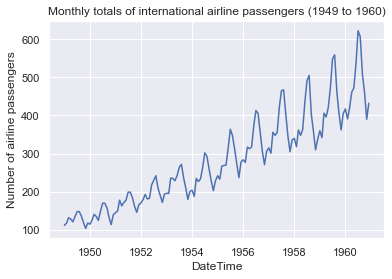

INFO:pytsal.visualization.eda:Constructed Time plot
INFO:pytsal.visualization.eda:Constructed decompose plot


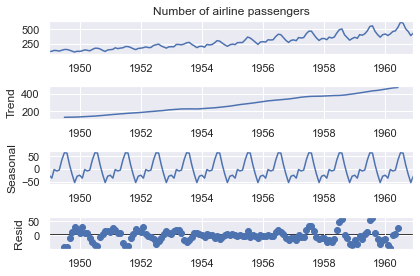

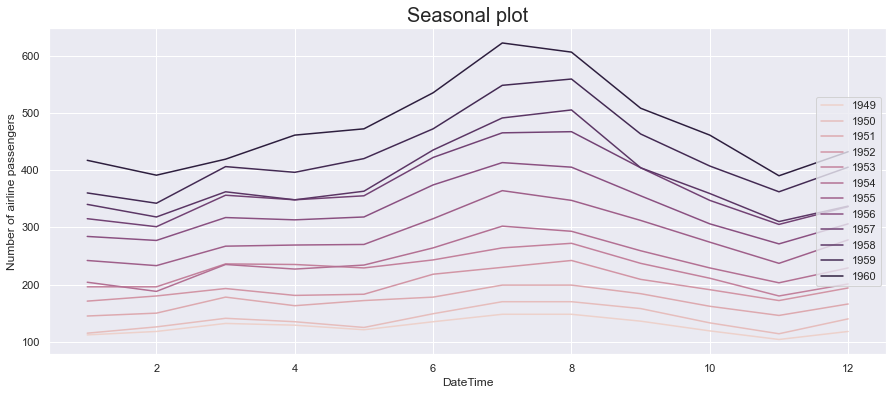

INFO:pytsal.visualization.eda:Constructed seasonal plot


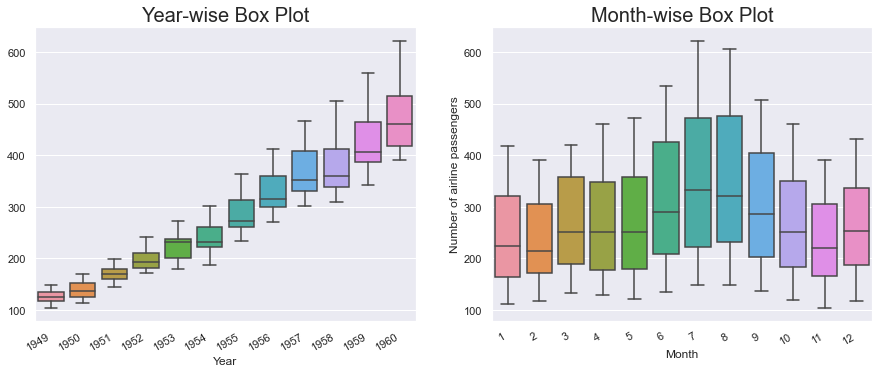

INFO:pytsal.visualization.eda:Constructed box plot


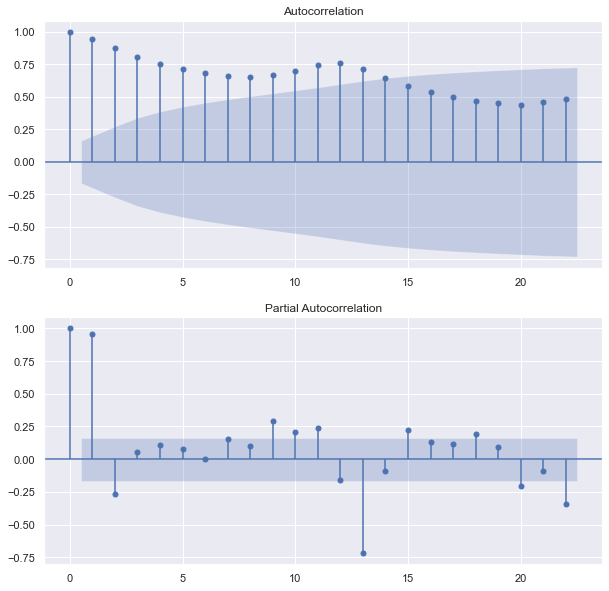

INFO:pytsal.visualization.eda:Constructed acf and pacf plot


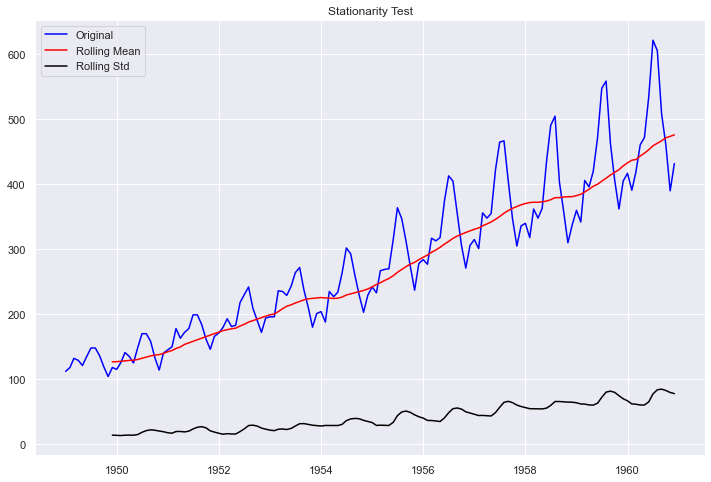

INFO:pytsal.visualization.eda:Performed stationary test plot
INFO:pytsal.visualization.eda:EDAVisualizer completed
INFO:pytsal.forecasting:Initialize model tuning ...
INFO:pytsal.forecasting:Initializing comparison plot ...


Results of Dickey-Fuller Test:
p-value = 0.9919. The series is likely non-stationary.
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value 1%               -3.481682
Critical Value 5%               -2.884042
Critical Value 10%              -2.578770
dtype: float64
9 tunable params available for <class 'pytsal.internal.containers.models.forecasting.HoltWinter'>


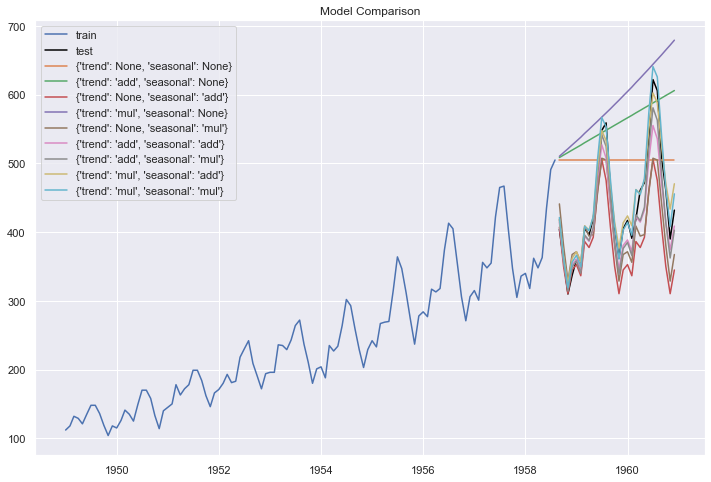

INFO:pytsal.forecasting:Tuning completed



 ###### TUNING SUMMARY #####

   model_name                                 args       score    aicc
8  HoltWinter  {'trend': 'mul', 'seasonal': 'mul'}   13.059587  559.88
7  HoltWinter  {'trend': 'mul', 'seasonal': 'add'}   15.063456  612.24
6  HoltWinter  {'trend': 'add', 'seasonal': 'mul'}   20.691185  561.14
5  HoltWinter  {'trend': 'add', 'seasonal': 'add'}   23.617284  608.54
4  HoltWinter   {'trend': None, 'seasonal': 'mul'}   42.468841  509.13
2  HoltWinter   {'trend': None, 'seasonal': 'add'}   52.680663  635.81
0  HoltWinter    {'trend': None, 'seasonal': None}   91.816338  766.88
1  HoltWinter   {'trend': 'add', 'seasonal': None}  123.776288  769.86
3  HoltWinter   {'trend': 'mul', 'seasonal': None}  152.986025  769.77

Best model: {'trend': 'mul', 'seasonal': 'mul'} with score: 13.059587412883499
--- Model Summary ---
{'trend': 'mul', 'seasonal': 'mul'}


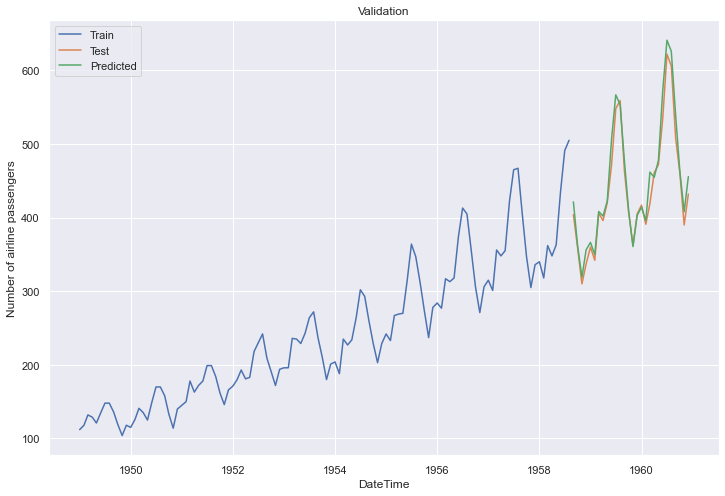

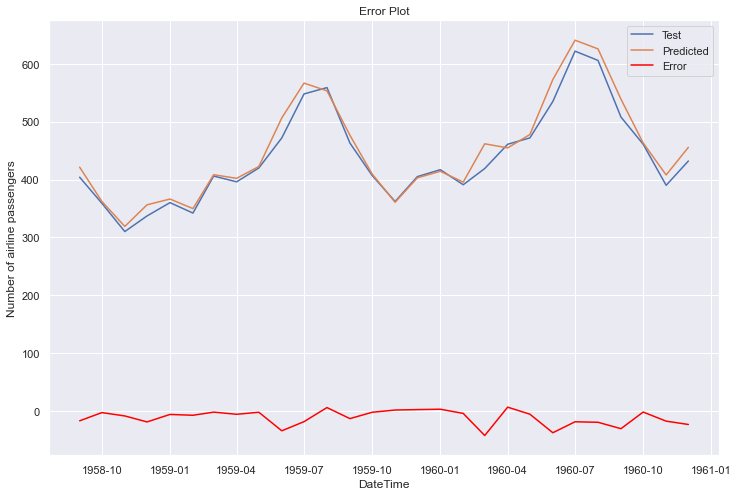

INFO:pytsal.forecasting:Experiment end @ 2021-05-08 13:55:51.964048


MAE      13.059587
MAPE      0.029045
AIC     552.826625
BIC     596.884068
AICC    559.878171
Name: Model metrics, dtype: float64


In [2]:
from pytsal.forecasting import *

model = setup(ts, 'holtwinter', eda=True, validation=True, find_best_model=True, plot_model_comparison=True)

### 4.1 Decoding the setup function

The `setup` function in pytsal is **one-stop solution** to EDA, Modelling, Parameter tuning and Validation. Additional params in setup function invoke several modules.

#### Function definition
```python
def setup(
        ts: TimeSeries,
        model_name: str,
        override_model=None,
        eda: bool = True,
        validation: bool = True,
        find_best_model: bool = True,
        validation_metric_name: str = 'MAE',
        plot_model_comparison: bool =True
)
```

* **ts** - pystal timeseries object / dataset
* **model_name** - forecasting model name
* **override_model** - use this paramter to provide the setup function with custom models. Useful for manual model evalution and prototyping
* **eda** - when set to True, the `EDAVisualizer` class is invoked which performs explainatory data analysis for the given time series providing crucial information about the time series and helps build better models.
* **validation** - when set to True, the `ValidationVisualizer` class is invoked which performs model validation and plots few validation plots for the model.
* **find_best_model** - when set to True, the `tune_model` function is invoked which performs hyperparameter tuning for the models and finds the best model using the **validation_metric_name**.
* **validation_metric_name** - metric to be used for hyper parameter tuning and cross validation
* **plot_model_comparison** - when set to True, a model comparision plot is constructed for all the hyper parameters evaluated.

## 5. Finalize the model

Model finalization is the last step in the experiment. The finalize() function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [3]:
trained_model = finalize(ts, model)


INFO:pytsal.forecasting:Finalizing model (Training on complete data) ... 


                           ExponentialSmoothing Model Results                           
Dep. Variable:     Number of airline passengers   No. Observations:                  144
Model:                     ExponentialSmoothing   SSE                          15805.326
Optimized:                                 True   AIC                            708.554
Trend:                           Multiplicative   BIC                            756.071
Seasonal:                        Multiplicative   AICC                           714.026
Seasonal Periods:                            12   Date:                 Sat, 08 May 2021
Box-Cox:                                  False   Time:                         13:55:52
Box-Cox Coeff.:                            None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.291

## 6. Saving the model

We have now finished the experiment by finalizing the holt winter model which is now stored in trained_model variable. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Do you have to go through the entire experiment again? The answer is no, Pytsal's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [4]:
save_model(trained_model)

INFO:pytsal.forecasting:Model saved to trained_model.pytsal


'Model saved'

## 7. Hurray!

This tutorial has covered the entire time series pipeline from data ingestion, pre-processing, eda, training the model, hyperparameter tuning and saving the model for later use. We have completed all of these steps in **less than 4 commands!**